<a href="https://colab.research.google.com/github/tmpereiram/Visualizacion---AGs-/blob/main/AG3_VisualizacionDeDatos_TaniaPereira.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importamos modulos
import pandas as pd
import io
import requests
import seaborn as sns
import timeit
import matplotlib.pyplot as plt

In [6]:
#Cargamos el dataset de los pasajeros del Titanic
url="https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv"
s=requests.get(url).content
titanic=pd.read_csv(io.StringIO(s.decode('utf -8')))

In [7]:
#Información del dataset
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [8]:
#Renombra la columna class=clase y fare=tarifa
titanic.rename(columns={'class': 'clase'},
inplace=True)
titanic.rename(columns={'fare': 'tarifa'},
inplace=True)

In [9]:
#Muestra los valores distintos para class(clase)
titanic.clase.unique()

array(['Third', 'First', 'Second'], dtype=object)

In [10]:
#Primeras 5 filas
titanic.head(5)

,survived,pclass,sex,age,sibsp,parch,tarifa,embarked,clase,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [16]:
#Añadimos la columna: is_old
###############################################
def is_old_func(row):
  return row['age'] > 60

titanic['is_old'] = titanic.apply(is_old_func, axis='columns')

#Añadimos la columna: is_baby
###############################################
titanic.eval ( ' is_baby = age< 15 ' , inplace = True)

#Imprimimos las Primeras 5 filas
titanic.head(5)


,survived,pclass,sex,age,sibsp,parch,tarifa,embarked,clase,who,adult_male,deck,embark_town,alive,alone,is_old,is_baby,class_num
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,False,False,3
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,False,False,1
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,False,False,3
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,False,False,1
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,False,False,3


In [14]:
#Definimos una variable numérica: class_num

def class_num_func(row):
  Clase={'Third':3,'First':1,'Second':2}
  return Clase[row.clase]
titanic['class_num'] = titanic.apply(class_num_func, axis='columns')

#Imprimimos las Primeras 5 filas
titanic.head(5)

,survived,pclass,sex,age,sibsp,parch,tarifa,embarked,clase,who,adult_male,deck,embark_town,alive,alone,is_old,is_baby,class_num
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,False,False,3
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,False,False,1
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,False,False,3
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,False,False,1
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,False,False,3


In [18]:
#Consulta con condiciones
titanic[
    (titanic.sex == 'female')
    & (titanic['clase'].isin(['First', 'Third']))
    & (titanic.age > 45 )
    & (titanic.survived == 0)
]

,survived,pclass,sex,age,sibsp,parch,tarifa,embarked,clase,who,adult_male,deck,embark_town,alive,alone,is_old,is_baby,class_num
132,0,3,female,47.0,1,0,14.5000,S,Third,woman,False,NaN,Southampton,no,False,False,False,3
177,0,1,female,50.0,0,0,28.7125,C,First,woman,False,C,Cherbourg,no,True,False,False,1
736,0,3,female,48.0,1,3,34.3750,S,Third,woman,False,NaN,Southampton,no,False,False,False,3


<Axes: xlabel='pclass', ylabel='count'>

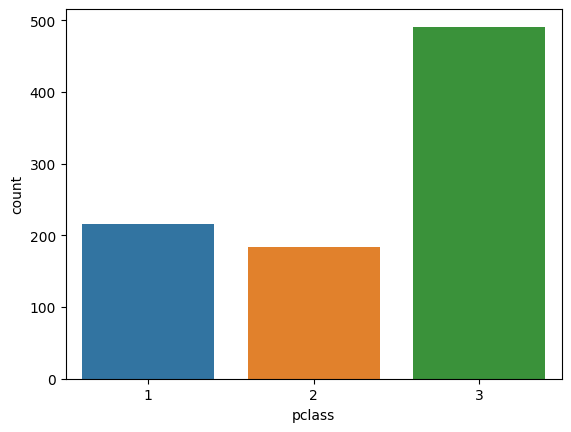

In [19]:
#Distribución de las clases
sns.countplot(x="pclass", data=titanic)

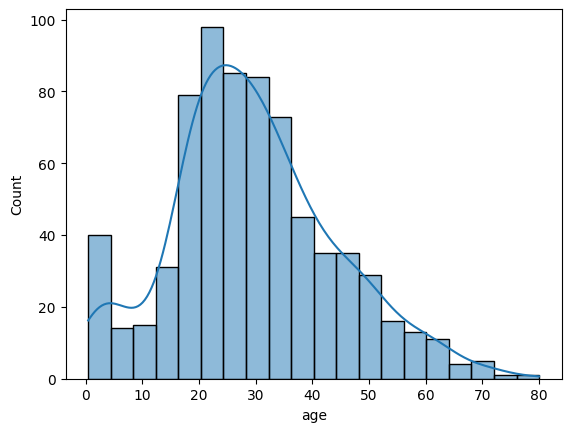

In [20]:
#Distribución de la edad(ege)
sns.histplot(titanic.age.dropna( ),
kde=True)
plt.show( )

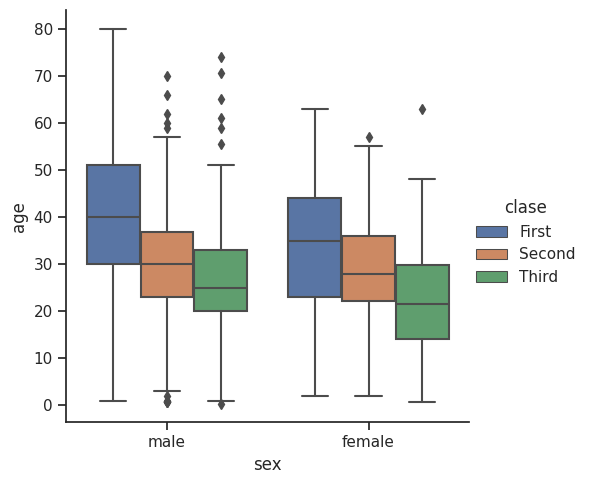

In [33]:
#BoxPlot de la edad por sexo y clase
orden = ['First','Second','Third']
with sns.axes_style(style='ticks'):
  ax = sns.catplot(data=titanic, x="sex", y="age", hue="clase", hue_order = orden, kind="box")

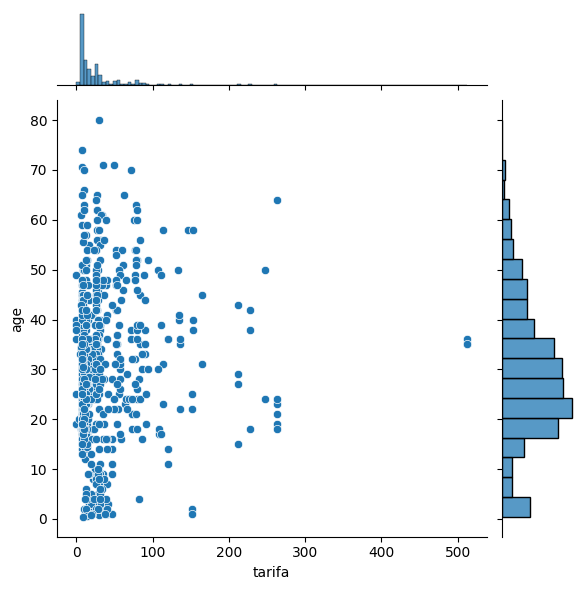

In [22]:
#Distribución cruzada de Edad y Tarifa
sns.jointplot(x='tarifa',y='age',data=titanic)

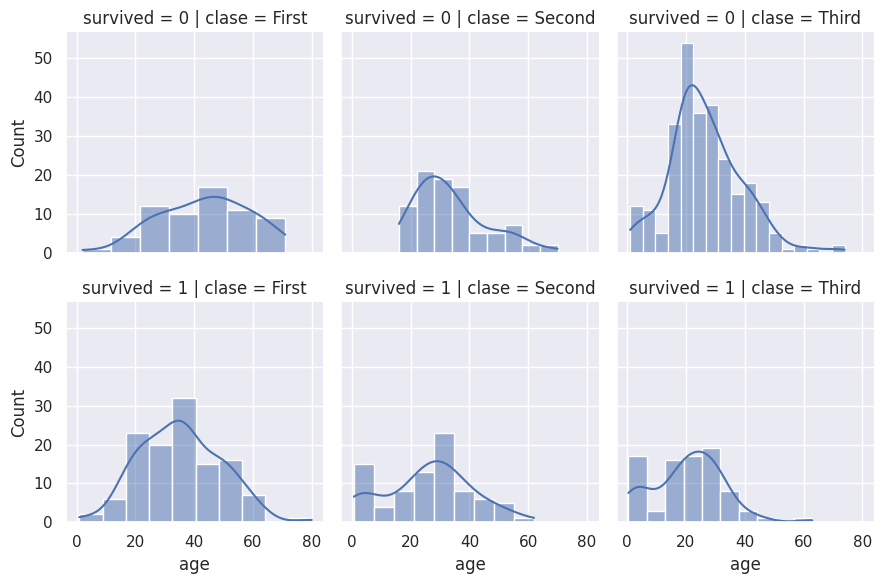

In [37]:
#Cambiamos el font
sns.set(font_scale=1)
orden = ['First','Second','Third']
#FacetGrid - Construir una matriz de gráficos
g = sns.FacetGrid(titanic, row='survived',col='clase', col_order=orden)
g.map(sns.histplot, "age", kde=True)
plt.show()

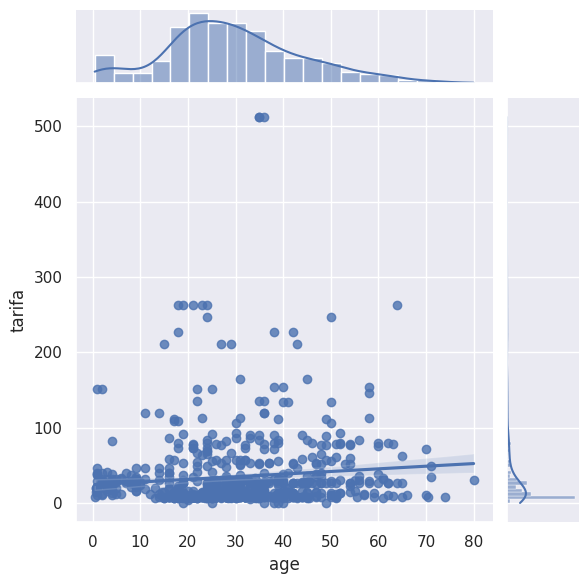

In [25]:
#Diagrama de dispersion con Distribucion de cada variable: fare(precio)/age(edad)

sns.jointplot(data=titanic, x='age', y='tarifa',kind='reg', color='b')
plt.show()

<ipython-input-26-9128748147e8>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  tc = titanic.corr()


Text(0.5, 1.0, 'titanic.corr()')

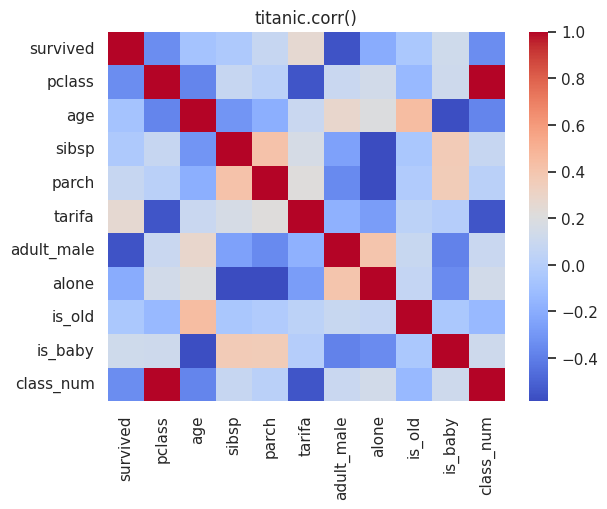

In [26]:
# Mapa de calor de correlaciones
tc = titanic.corr()
sns.heatmap(tc,cmap='coolwarm')
plt.title('titanic.corr()')

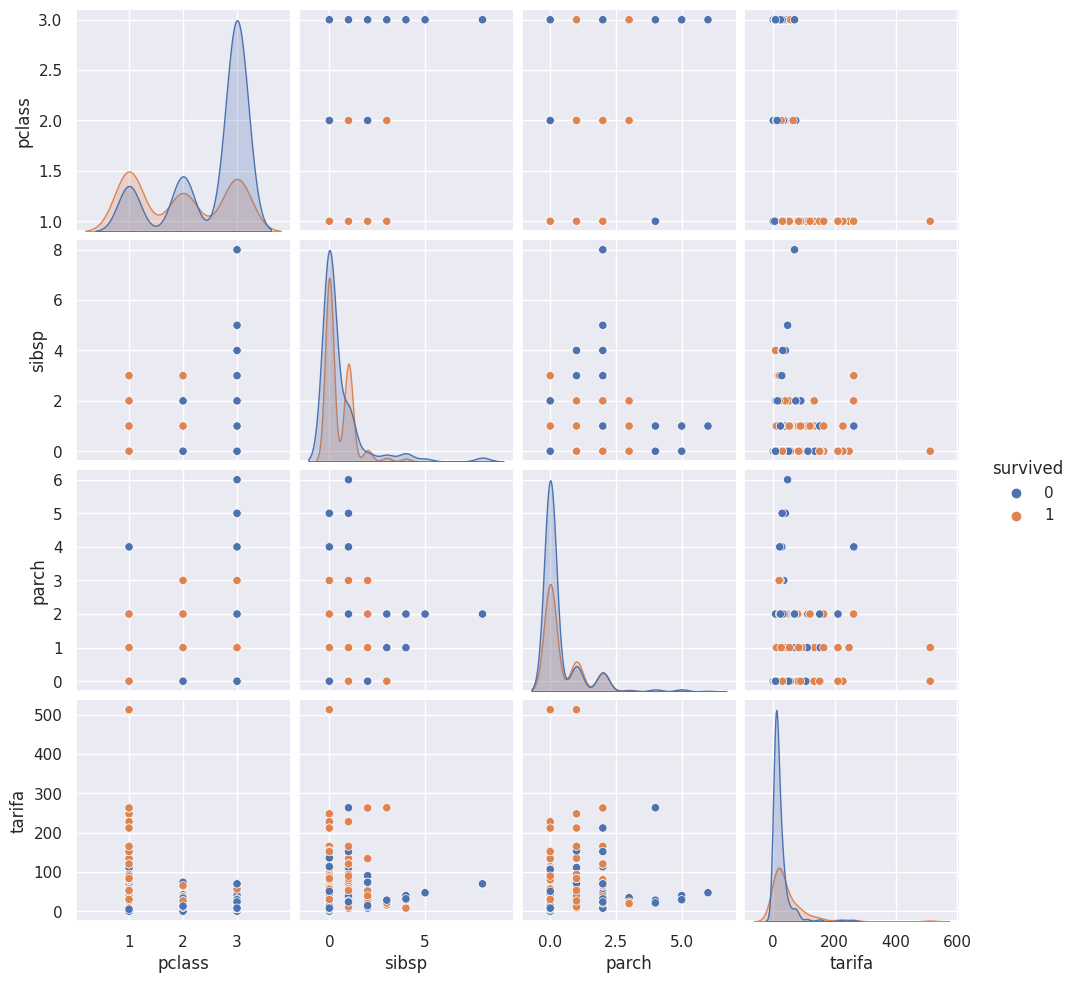

In [27]:
#Define un subconjuto de datos con las variables numéricas
titanic_num = titanic[['survived','pclass','sibsp','parch','tarifa']]

#Hace una matriz de diagramas de dispersión de parejas de variables.
sns.pairplot(titanic_num, hue="survived")
plt.show()

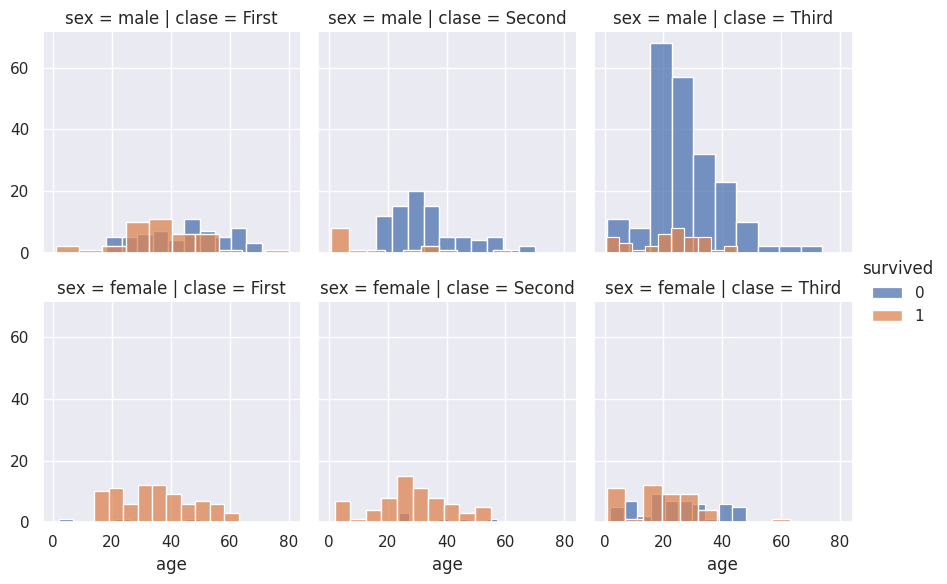

In [79]:
# Ampliación de la Practica 

sns.set(font_scale=1)
orden = ['First','Second','Third']
#FacetGrid - Construir una matriz de gráficos
g = sns.FacetGrid(titanic, row='sex',col='clase', hue='survived', col_order=orden)

# Para asemejar el  numero de bins mostrado en el slide 31 de la AG3
g.map(sns.histplot, "age", bins = 10) 

# Agregando la leyenda de Survived
g.add_legend()

# Remover el eje y Para asemejar el  numero de bins mostrado en el slide 31 de la AG3
g.set(ylabel=None) 
plt.show()
